In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import seaborn as sns
sns.set()
from datetime import datetime
from scipy.stats import chi2_contingency
%matplotlib inline

In [35]:
df_raw_accidents_descriptions = pd.read_csv(r'/home/lucas/Documents/data_sets/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')
df_raw_accidents_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
Unnamed: 0                  425 non-null int64
Data                        425 non-null object
Countries                   425 non-null object
Local                       425 non-null object
Industry Sector             425 non-null object
Accident Level              425 non-null object
Potential Accident Level    425 non-null object
Genre                       425 non-null object
Employee or Third Party     425 non-null object
Critical Risk               425 non-null object
Description                 425 non-null object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [3]:
#df_raw_accidents_descriptions['Accident Level'] = df_raw_accidents_descriptions['Accident Level'].astype('category')
#df_raw_accidents_descriptions['Accident Level'].cat.categories = [4,3,2,1,0]
#df_raw_accidents_descriptions['Accident Level'] = df_raw_accidents_descriptions['Accident Level'].astype('float')

#df_raw_accidents_descriptions['Employee or Third Party'] = df_raw_accidents_descriptions['Employee or Third Party'].astype('category')
#df_raw_accidents_descriptions['Employee or Third Party'].cat.categories = [3,2,1]
#df_raw_accidents_descriptions['Employee or Third Party'] = df_raw_accidents_descriptions['Employee or Third Party'].astype('float')

#df_raw_accidents_descriptions.corr()

In [4]:
dummies_employeeorthrid = pd.get_dummies(df_raw_accidents_descriptions['Employee or Third Party'])
dummies_employeeorthrid


,Employee,Third Party,Third Party (Remote)
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,0,1,0


In [5]:
dummies_Local= pd.get_dummies(df_raw_accidents_descriptions['Local'])


In [6]:
dummies_Acident = pd.get_dummies(df_raw_accidents_descriptions['Accident Level'])
dummies_Acident

,I,II,III,IV,V
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,1,0
5,1,0,0,0,0
6,1,0,0,0,0
7,1,0,0,0,0
8,1,0,0,0,0
9,1,0,0,0,0


In [7]:
df_raw_accidents_descriptions.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [8]:
df_only_categorical = df_raw_accidents_descriptions.select_dtypes(include=['object']).copy()
df_only_categorical.head()
print(df_only_categorical.isnull().values.sum())
print(df_only_categorical.isnull().sum()) #colunm wise

0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64


In [9]:
df_only_categorical['Critical Risk'].value_counts()

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
Pressurized Systems                            7
remains of choco                               7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Machine Protection                             2
Projection of fragme

In [10]:
#@to know the number os distingcs category
df_only_categorical['Critical Risk'].value_counts().count()


33

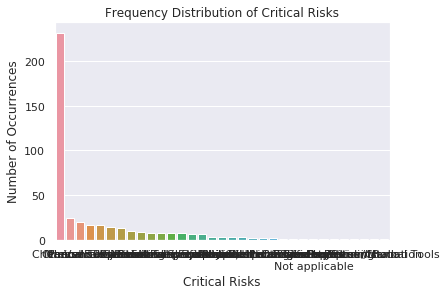

In [11]:
#freq distribution of the ctitical risks
Critical_Risks_freq = df_only_categorical['Critical Risk'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Critical_Risks_freq.index, Critical_Risks_freq.values, alpha=1)
plt.title('Frequency Distribution of Critical Risks')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Critical Risks', fontsize=12)
plt.show()

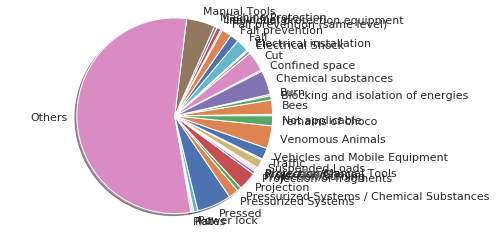

In [12]:
labels = df_only_categorical['Critical Risk'].astype('category').cat.categories.tolist()
counts = df_only_categorical['Critical Risk'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [13]:
#trocando o nome por um número!!!

labels = df_only_categorical['Critical Risk'].astype('category').cat.categories.tolist()
replace_map_comp = {'Critical Risk' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

df_only_categorical_replacing = df_only_categorical.copy()
df_only_categorical_replacing

{'Critical Risk': {'\nNot applicable': 1, 'Bees': 2, 'Blocking and isolation of energies': 3, 'Burn': 4, 'Chemical substances': 5, 'Confined space': 6, 'Cut': 7, 'Electrical Shock': 8, 'Electrical installation': 9, 'Fall': 10, 'Fall prevention': 11, 'Fall prevention (same level)': 12, 'Individual protection equipment': 13, 'Liquid Metal': 14, 'Machine Protection': 15, 'Manual Tools': 16, 'Others': 17, 'Plates': 18, 'Poll': 19, 'Power lock': 20, 'Pressed': 21, 'Pressurized Systems': 22, 'Pressurized Systems / Chemical Substances': 23, 'Projection': 24, 'Projection of fragments': 25, 'Projection/Burning': 26, 'Projection/Choco': 27, 'Projection/Manual Tools': 28, 'Suspended Loads': 29, 'Traffic': 30, 'Vehicles and Mobile Equipment': 31, 'Venomous Animals': 32, 'remains of choco': 33}}


,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
5,2016-01-12 00:00:00,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressurized Systems,During the unloading operation of the ustulado...
6,2016-01-16 00:00:00,Country_02,Local_05,Metals,I,III,Male,Employee,Fall prevention (same level),The collaborator reports that he was on street...
7,2016-01-17 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic..."
8,2016-01-19 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Third Party (Remote),Others,Employee was sitting in the resting area at le...
9,2016-01-26 00:00:00,Country_01,Local_06,Metals,I,II,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...


In [14]:

df_only_categorical_replacing.replace(replace_map_comp)

df_only_categorical_replacing

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
5,2016-01-12 00:00:00,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressurized Systems,During the unloading operation of the ustulado...
6,2016-01-16 00:00:00,Country_02,Local_05,Metals,I,III,Male,Employee,Fall prevention (same level),The collaborator reports that he was on street...
7,2016-01-17 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic..."
8,2016-01-19 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Third Party (Remote),Others,Employee was sitting in the resting area at le...
9,2016-01-26 00:00:00,Country_01,Local_06,Metals,I,II,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...


In [15]:
df_only_categorical_onehot = df_only_categorical.copy()
df_only_categorical_onehot = pd.get_dummies(df_only_categorical_onehot, columns=['Critical Risk','Accident Level','Employee or Third Party'], prefix = ['Crit.Risk','Accident Level', ''])

df_only_categorical_onehot.head()

,Data,Countries,Local,Industry Sector,Potential Accident Level,Genre,Description,Crit.Risk_ Not applicable,Crit.Risk_Bees,Crit.Risk_Blocking and isolation of energies,...,Crit.Risk_Venomous Animals,Crit.Risk_remains of choco,Accident Level_I,Accident Level_II,Accident Level_III,Accident Level_IV,Accident Level_V,_Employee,_Third Party,_Third Party (Remote)
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,IV,Male,While removing the drill rod of the Jumbo 08 f...,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,IV,Male,During the activation of a sodium sulphide pum...,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,III,Male,In the sub-station MILPO located at level +170...,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,Male,Being 9:45 am. approximately in the Nv. 1880 C...,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,Male,Approximately at 11:45 a.m. in circumstances t...,0,0,0,...,0,0,0,0,0,1,0,0,1,0


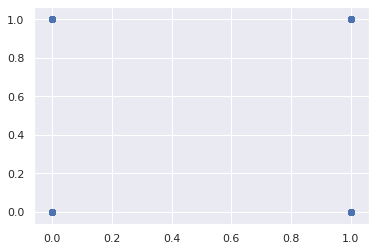

In [16]:
#trying to make a coorrelation with the accident and third party workers
df_only_categorical_onehot['Accident Level_V'].corr(df_only_categorical_onehot['_Third Party'])

plt.scatter(df_only_categorical_onehot['_Third Party'],df_only_categorical_onehot['Accident Level_IV'])

In [17]:
df_only_categorical_onehot_sklearn = df_only_categorical.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_only_categorical_onehot_sklearn['Accident Level'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results_df.head()

,I,II,III,IV,V
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,1,0


In [18]:
df_only_categorical_ce = df_only_categorical.copy()

import category_encoders as ce

encoder = ce.BackwardDifferenceEncoder(cols=['Accident Level','Employee or Third Party'])
df_bd = encoder.fit_transform(df_only_categorical_ce)

df_bd.head()

,intercept,Data,Countries,Local,Industry Sector,Accident Level_0,Accident Level_1,Accident Level_2,Accident Level_3,Potential Accident Level,Genre,Employee or Third Party_0,Employee or Third Party_1,Critical Risk,Description
0,1,2016-01-01 00:00:00,Country_01,Local_01,Mining,-0.8,-0.6,-0.4,-0.2,IV,Male,-0.666667,-0.333333,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,-0.8,-0.6,-0.4,-0.2,IV,Male,0.333333,-0.333333,Pressurized Systems,During the activation of a sodium sulphide pum...
2,1,2016-01-06 00:00:00,Country_01,Local_03,Mining,-0.8,-0.6,-0.4,-0.2,III,Male,0.333333,0.666667,Manual Tools,In the sub-station MILPO located at level +170...
3,1,2016-01-08 00:00:00,Country_01,Local_04,Mining,-0.8,-0.6,-0.4,-0.2,I,Male,-0.666667,-0.333333,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,1,2016-01-10 00:00:00,Country_01,Local_04,Mining,0.2,-0.6,-0.4,-0.2,IV,Male,-0.666667,-0.333333,Others,Approximately at 11:45 a.m. in circumstances t...


In [19]:
df_bd['Accident Level_3'].corr(df_bd['Employee or Third Party_1'])


0.04710010373864799

In [20]:
df_grouped = df_raw_accidents_descriptions.groupby(['Employee or Third Party','Accident Level','Countries'])[['Local']].describe()
df_to_save = df_grouped.reset_index()
df_to_save

df_to_save.to_csv('/home/lucas/Documents/data_sets/output_from_the_studies', index=False)

In [21]:
#rawText = StringIO()
myData = pd.read_csv(r'/home/lucas/Documents/data_sets/categoricalcorrel.csv', sep = "\s+")
myData

,A,B,C
0,100.1396,1.343921,Medium
1,105.3268,1.786945,Medium
2,200.3766,9.628746,High
3,150.2400,4.225647,Medium-High


In [22]:
myData['C'] = myData['C'].astype('category')
myData['C'].cat.categories = [2,0,1]
myData['C'] = myData['C'].astype('float')
myData.corr()

,A,B,C
A,1.000000,0.986493,0.998874
B,0.986493,1.000000,0.982982
C,0.998874,0.982982,1.000000


In [23]:
data_crosstab = pd.crosstab(df_raw_accidents_descriptions['Accident Level'], df_raw_accidents_descriptions['Employee or Third Party'], margins = False) 
#data_crosstab.corr(data_crosstab['Employee or Third Party'])#['Third Party'].corr(data_crosstab['IV'])


In [25]:
df = pd.concat(df_raw_accidents_descriptions['Accident Level'], df_raw_accidents_descriptions['Employee or Third Party'])
df

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"

In [26]:
#AQUI NÃO SEI SE ESTÁ CORRETO
print('Correlation between Third Patry and Accidents Level IV = ',dummies_employeeorthrid['Third Party'].corr(dummies_Acident[1]))
print('Correlation between Employee and Accidents Level II = ',dummies_employeeorthrid['Employee'].corr(dummies_Acident[2]))

KeyError: 1

## chi squared

#####import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns

tips = sns.load_dataset("tips")

tips["total_bill_cut"] = pd.cut(tips["total_bill"],
                                np.arange(0, 55, 5),
                                include_lowest=True,
                                right=False)

def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

confusion_matrix = pd.crosstab(tips["day"], tips["time"]).as_matrix()
cramers_v(confusion_matrix)
Out[10]: 0.93866193407222209

confusion_matrix = pd.crosstab(tips["total_bill_cut"], tips["time"]).as_matrix()
cramers_v(confusion_matrix)
Out[24]: 0.16498707494988371

## outro

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
    
#Fontes
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

In [27]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [28]:
'''copying a Critical risk colunm in order to delete the "other" class'''
dfrisk_without_others =  df_raw_accidents_descriptions['Critical Risk'].copy()
del(dfrisk_without_others ['Others'])

KeyError: 'Others'

In [36]:
#cramers_v(df_raw_accidents_descriptions['Accident Level'], df_raw_accidents_descriptions['Employee or Third Party'])
#print(cramers_v)
#def cramers_v(df_raw_accidents_descriptions['Accident Level'],df_raw_accidents_descriptions['Employee or Third Party'])
#df_raw_accidents_descriptions['Accident Level']

confusion_matrix = pd.crosstab(df_raw_accidents_descriptions['Employee or Third Party'],df_raw_accidents_descriptions['Accident Level'])
confusion_matrix.loc['Third Party'] += confusion_matrix.loc['Third Party (Remote)']
confusion_matrix.drop(['Third Party (Remote)'], inplace=True)


confusion_matrix.drop(['V'], axis = 1, inplace=True)

confusion_matrix
print(confusion_matrix)
chi2 = ss.chi2_contingency(confusion_matrix)
print(chi2)

print(confusion_matrix.sum().sum())
#plt.plot(confusion_matrix)
'''n = confusion_matrix.sum().sum()
print(n)
phi2 = chi2/n
print(phi2)
r,k = confusion_matrix.shape
print(r,k)
phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
print(phi2corr)
kcorr = k-((k-1)**2)/(n-1)
rcorr = r-((r-1)**2)/(n-1)
result = np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
print(result)'''


Accident Level             I  II  III  IV
Employee or Third Party                  
Employee                 140  15   14  10
Third Party              176  25   17  20
(1.9155463116991833, 0.5901190352543639, 3, array([[135.64508393,  17.17026379,  13.30695444,  12.87769784],
       [180.35491607,  22.82973621,  17.69304556,  17.12230216]]))
417


'n = confusion_matrix.sum().sum()\nprint(n)\nphi2 = chi2/n\nprint(phi2)\nr,k = confusion_matrix.shape\nprint(r,k)\nphi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))\nprint(phi2corr)\nkcorr = k-((k-1)**2)/(n-1)\nrcorr = r-((r-1)**2)/(n-1)\nresult = np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))\nprint(result)'

In [30]:
def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [31]:
n = df_raw_accidents_descriptions['Accident Level']
m = df_raw_accidents_descriptions['Critical Risk']
print(theils_u(n,m))
    

NameError: name 'conditional_entropy' is not defined